# Social Features

## 1 Introduction
This notebook is used to preprocess the social post information, and perform exploratory data analysis & feature engineering on it.

## 2 Project Pipeline
- Data Reading / Data Understanding
- Data Preprocessing
- Exploratory Data Analysis
- Feature Engineering

## 3 Data Reading / Data Understanding

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

/home/allen/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# # Extracting the train data
# !unzip -o '/content/drive/MyDrive/M.Sc. Dissertation/Data & Code/train_allmetadata_json.zip' -d '/content/drive/MyDrive/M.Sc. Dissertation/Data & Code'

In [4]:
# # Loading the training data
# user_df = pd.read_json('/content/drive/MyDrive/M.Sc. Dissertation/Data & Code/train_user_data.json')
# user_df.head()

In [5]:
# user_df.shape

In [6]:
# info_df = pd.read_json('/content/drive/MyDrive/M.Sc. Dissertation/Data & Code/train_additional_information.json')
# info_df.shape

In [7]:
# cat_df = pd.read_json('/content/drive/MyDrive/M.Sc. Dissertation/Data & Code/train_category.json')
# cat_df.shape

In [8]:
# imgpath_df = pd.read_table('/content/drive/MyDrive/M.Sc. Dissertation/Data & Code/train_img_filepath.txt',names=['img_path'])
# imgpath_df.shape

In [9]:
# tempspa_df = pd.read_json('/content/drive/MyDrive/M.Sc. Dissertation/Data & Code/train_temporalspatial_information.json')
# tempspa_df.shape

In [10]:
# text_df = pd.read_json('/content/drive/MyDrive/M.Sc. Dissertation/Data & Code/train_text.json')
# text_df.shape

In [11]:
# label_df = pd.read_table('/content/drive/MyDrive/M.Sc. Dissertation/Data & Code/train_label.txt',names=['label'])
# label_df.shape

In [12]:
# # Comparing 'Pid' and 'Uid' from the various tables
# for t in ['Pid','Uid']:
#   print((info_df[t]==cat_df[t]).sum()==305613)
#   print((info_df[t]==tempspa_df[t]).sum()==305613)
#   print((info_df[t]==text_df[t]).sum()==305613)

In [13]:
# # The above result shows that the DataFrames can be safely concatenated along axis 1
# # Concatenting the tables
# df = pd.concat([info_df,user_df,tempspa_df,cat_df,imgpath_df,text_df,label_df],axis=1)

In [14]:
# df.shape

In [15]:
# # Dropping duplicate columns
# df = df.loc[:,~df.columns.duplicated()]

In [16]:
# # Checking whether the image paths match the Pid and Uid
# (df['img_path'].apply(lambda x: int(pathlib.PurePath(x).parts[2][:-4]))==df['Pid']).sum()

In [17]:
# (df['img_path'].apply(lambda x: pathlib.PurePath(x).parts[1])==df['Uid']).sum()

Thus, the image paths match the Pid and Uid.

In [18]:
# # Saving the DataFrame for future use
# df.to_json('/content/drive/MyDrive/M.Sc. Dissertation/Data & Code/train_data.json')

In [ ]:
df = pd.read_json('train_data.json')

## 4 Data Preprocessing

In [20]:
# Checking and fixing header rows
df.head()

,Mediastatus,Pathalias,Ispublic,Pid,Uid,photo_firstdatetaken,location_description,photo_count,ispro,user_description,canbuypro,timezone_timezone_id,photo_firstdate,timezone_offset,Postdate,Longitude,Geoaccuracy,Latitude,Category,Concept,Subcategory,img_path,Alltags,Mediatype,Title,label
0,ready,luisdrayton,1,775,59@N75,1904010100,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....",6828,1,"0.0866962,-0.0752717,-0.0149407,-0.0460858,-0....",0,9,1213743830,1,1446016778,,0,0.0,Fashion,glam,Fashion,train/59@N75/775.jpg,rock punk transgender tranny electronicmusic e...,photo,Luis Drayton - Edinburgh shoot #6,11.18
1,ready,claudiolara,1,1075,1@N18,1867010100,\n,32102,1,"0.14628,-0.0255633,-0.0711352,0.120531,-0.0728...",0,2,1263266743,0,1454983379,,0,0.0,Travel&Active&Sports,fifa,Soccer,train/1@N18/1075.jpg,brazil rio brasil riodejaneiro by maria fifa m...,photo,Arena da Barra - Arena HSBC - Arena do PAN #...,15.15
2,ready,rizzato,1,4890,351@N64,2005100100,"0.0334692,-0.0585118,0.158872,-0.000377208,-0....",276,0,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....",0,11,1296417600,-3,1433118604,,0,0.0,Entertainment,cinema,Movies,train/351@N64/4890.jpg,old cinema beauty marilyn photoshop movie joke...,photo,MARILYN 2015,10.99
3,ready,4kleuren,1,6568,6@N59,1867010100,\n,32102,1,"0.14628,-0.0255633,-0.0711352,0.120531,-0.0728...",0,2,1263266743,0,1451577600,,0,0.0,Holiday&Celebrations,old,Birthday,train/6@N59/6568.jpg,pictures old family scans brothers sister 1958...,photo,Knikkertijd - 1959,8.63
4,ready,glosackmd,1,7079,1617@N40,1867010100,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....",32102,1,"0.14628,-0.0255633,-0.0711352,0.120531,-0.0728...",0,2,1263266743,0,1425744438,,0,0.0,Food,thirsty,Drinks,train/1617@N40/7079.jpg,hot sahara animal animals desert bottles drink...,photo,CAMELS01,11.16


In [21]:
df.shape

(305613, 26)

In [22]:
# Checking and fixing footer rows
df.tail()


,Mediastatus,Pathalias,Ispublic,Pid,Uid,photo_firstdatetaken,location_description,photo_count,ispro,user_description,canbuypro,timezone_timezone_id,photo_firstdate,timezone_offset,Postdate,Longitude,Geoaccuracy,Latitude,Category,Concept,Subcategory,img_path,Alltags,Mediatype,Title,label
305608,ready,None,1,1118328,62225@N20,1978071117,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....",8301,1,"0.104426,0.0598804,-0.0149883,0.0338535,-0.007...",0,49,1277859911,12,1433577362,,0,0.000000,Animal,creature,Insects,train/62225@N20/1118328.jpg,york travel sky urban sun france color tree gr...,photo,Mushrooms,4.00
305609,ready,matty3126,1,1118334,108435@N35,2000010100,\n,801,0,"0.114495,-0.0303421,-0.0893819,0.0774031,-0.08...",0,3,1398624531,-6,1439629953,,0,0.000000,Social&People,portrait,Selfies,train/108435@N35/1118334.jpg,portrait cute animal cat furry panasonic calic...,photo,Evie,1.00
305610,ready,khooxotics,1,1118342,84730@N71,2013051813,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....",574,0,"0.18969,-0.0675743,-0.125082,0.097416,-0.02100...",0,2,1394377573,0,1444462129,,0,0.000000,Travel&Active&Sports,exotic,Cars,train/84730@N71/1118342.jpg,car exotic german malaysia kualalumpur superca...,photo,BSSLS+R8GT!!,2.00
305611,ready,stevetaylors,1,1118344,9542@N37,2006052512,\n,7167,1,"0.142518,-0.0121231,-0.0464556,0.0887664,-0.02...",0,20,1234576422,10,1442458947,,0,0.000000,Whether&Season,cloud,Cloudy,train/9542@N37/1118344.jpg,city newzealand christchurch cloud building ca...,photo,C to A1,6.89
305612,ready,maelick,1,1118345,92344@N20,2006052512,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....",7167,1,"0.142518,-0.0121231,-0.0464556,0.0887664,-0.02...",0,20,1234576422,10,1426067443,-73.97972,16,40.759166,Travel&Active&Sports,travel,Travel,train/92344@N20/1118345.jpg,city travel winter usa newyork skyline america...,photo,Empire State Building,1.58


Since the footer rows have no anomalies, no changes are required.

In [23]:
# Checking and fixing duplicate rows
df[df.duplicated(subset='Pid')]

,Mediastatus,Pathalias,Ispublic,Pid,Uid,photo_firstdatetaken,location_description,photo_count,ispro,user_description,canbuypro,timezone_timezone_id,photo_firstdate,timezone_offset,Postdate,Longitude,Geoaccuracy,Latitude,Category,Concept,Subcategory,img_path,Alltags,Mediatype,Title,label


In [24]:
# Calculating the percentage of missing values in each column
null_per = df.isna().sum()/len(df)*100
null_per.sort_values(ascending=False)

Mediastatus             0.0
Pathalias               0.0
Title                   0.0
Mediatype               0.0
Alltags                 0.0
img_path                0.0
Subcategory             0.0
Concept                 0.0
Category                0.0
Latitude                0.0
Geoaccuracy             0.0
Longitude               0.0
Postdate                0.0
timezone_offset         0.0
photo_firstdate         0.0
timezone_timezone_id    0.0
canbuypro               0.0
user_description        0.0
ispro                   0.0
photo_count             0.0
location_description    0.0
photo_firstdatetaken    0.0
Uid                     0.0
Pid                     0.0
Ispublic                0.0
label                   0.0
dtype: float64

No changes are required at this point since there are no explicit missing values.

### 4.1 Fixing data types

In [25]:
# Printing data types of all variables to identify anomalies
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305613 entries, 0 to 305612
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Mediastatus           305613 non-null  object 
 1   Pathalias             305613 non-null  object 
 2   Ispublic              305613 non-null  int64  
 3   Pid                   305613 non-null  int64  
 4   Uid                   305613 non-null  object 
 5   photo_firstdatetaken  305613 non-null  int64  
 6   location_description  305613 non-null  object 
 7   photo_count           305613 non-null  int64  
 8   ispro                 305613 non-null  int64  
 9   user_description      305613 non-null  object 
 10  canbuypro             305613 non-null  int64  
 11  timezone_timezone_id  305613 non-null  int64  
 12  photo_firstdate       305613 non-null  object 
 13  timezone_offset       305613 non-null  int64  
 14  Postdate              305613 non-null  int64  
 15  Longi

In [26]:
# Viewing photo_firstdate
df['photo_firstdate'].sort_values()

226300        
172449        
172448        
172447        
172446        
          ... 
248139    None
248138    None
248137    None
248135    None
121797    None
Name: photo_firstdate, Length: 305613, dtype: object

In [27]:
# Imputing missing values with np.NaN
df['photo_firstdate'] = df['photo_firstdate'].map(lambda x: np.NaN if (x=='' or x=='None') else int(x))

In [28]:
df['photo_firstdate'].value_counts()

photo_firstdate
1.339981e+09    1376
1.442848e+09    1245
1.130986e+09    1120
1.039789e+09    1104
1.460992e+09    1100
                ... 
1.215834e+09       1
1.404107e+09       1
1.170280e+09       1
1.442329e+09       1
1.189171e+09       1
Name: count, Length: 38239, dtype: int64

In [29]:
# Converting photo_firstdate to datetime
df['photo_firstdate'] = pd.to_datetime(df['photo_firstdate'],unit='s')

In [30]:
# Converting Postdate to datetime
df['Postdate'] = pd.to_datetime(df['Postdate'],unit='s')
df['Postdate']

0        2015-10-28 07:19:38
1        2016-02-09 02:02:59
2        2015-06-01 00:30:04
3        2015-12-31 16:00:00
4        2015-03-07 16:07:18
                 ...        
305608   2015-06-06 07:56:02
305609   2015-08-15 09:12:33
305610   2015-10-10 07:28:49
305611   2015-09-17 03:02:27
305612   2015-03-11 09:50:43
Name: Postdate, Length: 305613, dtype: datetime64[ns]

In [31]:
# Dropping photo_firstdatetaken, which will not be used in the study
df = df.drop(columns='photo_firstdatetaken')

In [32]:
# Viewing unique values of 'Longitude'
df['Longitude'].value_counts()

Longitude
             270684
-87.85915       718
-73.10693       453
7.01860         386
-83.74890       324
              ...  
147.11944         1
-73.94837         1
-61.80003         1
-99.72976         1
-73.97972         1
Name: count, Length: 17229, dtype: int64

In [33]:
# Replacing empty strings with NaN
df['Longitude'] = df['Longitude'].map(lambda x: np.NaN if x=='' else float(x))

In [34]:
# Vieiwing unique values of 'Latitude'
df['Latitude'].value_counts()

Latitude
0.000000     270686
41.981378       718
43.551083       386
42.188894       324
52.444932       315
              ...  
51.753409         1
55.757971         1
55.690213         1
48.870421         1
40.759166         1
Name: count, Length: 17594, dtype: int64

In [35]:
# Viewing unique values of 'Geoaccuracy'
df['Geoaccuracy'].value_counts()

Geoaccuracy
0     270798
16     23230
15      5568
14      2260
13      1475
12      1086
11       494
10       280
9        241
8        117
7         24
6         15
5         10
4          8
3          5
2          2
Name: count, dtype: int64

In [36]:
# Imputing null values to 'Latitude' and 'Longitude' when 'Geoaccuracy' is 0
df['Latitude'] = df[['Latitude','Geoaccuracy']].apply(lambda row: np.NaN if row['Geoaccuracy']==0 else row['Latitude'],axis=1)
df['Longitude'] = df[['Longitude','Geoaccuracy']].apply(lambda row: np.NaN if row['Geoaccuracy']==0 else row['Longitude'],axis=1)

In [37]:
df['Longitude'].value_counts()

Longitude
-87.85915    718
-73.10693    453
 7.01860     386
-83.74890    324
-6.76612     315
            ... 
-8.61456       1
-75.16652      1
-0.17390       1
-69.10917      1
-73.97972      1
Name: count, Length: 17135, dtype: int64

In [38]:
df['Latitude'].value_counts()

Latitude
41.981378    718
43.551083    386
42.188894    324
52.444932    315
44.346670    264
            ... 
45.791111      1
44.491546      1
14.638773      1
42.357402      1
40.759166      1
Name: count, Length: 17500, dtype: int64

In [39]:
(df['Latitude']==0).sum()

2

In [40]:
# Viewing columns with Geoaccuracy > 0 and Latitude or Longitude equal to 0
df[['Latitude','Longitude','Geoaccuracy']][((df['Longitude']==np.NaN)|(df['Longitude']==np.NaN))&(df['Geoaccuracy']>0)]

,Latitude,Longitude,Geoaccuracy


Since there are no such values, the location data is consistent.

### 4.2 Validating data

In [41]:
# Printing descriptive statistics of numeric variables to identify anomalies
df.describe()

,Ispublic,Pid,photo_count,ispro,canbuypro,timezone_timezone_id,photo_firstdate,timezone_offset,Postdate,Longitude,Geoaccuracy,Latitude,label
count,305613.000000,3.056130e+05,3.056130e+05,305613.000000,305613.000000,305613.000000,305148,305613.000000,305613,34815.000000,305613.000000,34815.000000,305613.000000
mean,0.999856,3.929263e+05,1.395869e+04,0.371637,0.017666,7.632123,2011-10-01 13:37:09.258038528,-1.605809,2015-10-16 14:45:29.846086400,-21.368767,1.736657,37.135670,6.405524
min,0.000000,7.750000e+02,0.000000e+00,0.000000,0.000000,0.000000,1970-01-01 00:00:00,-12.000000,2015-02-28 16:00:00,-159.336130,0.000000,-75.901477,1.000000
25%,1.000000,2.430800e+05,6.470000e+02,0.000000,0.000000,2.000000,2009-02-10 19:52:34,-5.000000,2015-08-04 09:01:37,-82.410480,0.000000,35.002268,4.700000
50%,1.000000,3.275460e+05,2.729000e+03,0.000000,0.000000,5.000000,2012-05-16 06:58:08,0.000000,2015-10-31 08:08:58,-2.243270,0.000000,41.981378,6.230000
75%,1.000000,4.252650e+05,9.229000e+03,1.000000,0.000000,9.000000,2014-10-14 14:15:01,0.000000,2016-01-04 09:23:10,12.479130,0.000000,49.276145,7.980000
max,1.000000,1.118345e+06,2.978819e+06,1.000000,1.000000,95.000000,2016-07-27 08:07:36,13.000000,2016-02-29 15:54:26,179.333150,16.000000,73.574427,16.560000
std,0.011998,2.221596e+05,9.234716e+04,0.483243,0.131735,10.471820,NaN,4.271962,NaN,71.120934,4.868433,20.845264,2.473008


In [42]:
# Viewing the zero values of 'Ispublic'
df[df['Ispublic']==0]

,Mediastatus,Pathalias,Ispublic,Pid,Uid,location_description,photo_count,ispro,user_description,canbuypro,timezone_timezone_id,photo_firstdate,timezone_offset,Postdate,Longitude,Geoaccuracy,Latitude,Category,Concept,Subcategory,img_path,Alltags,Mediatype,Title,label
9228,ready,cirque_du_rouge,0,167288,24323@N25,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....",30686,1,"0.169433,-0.0548808,-0.0810269,0.0718097,-0.04...",0,2,2005-07-29 06:38:26,0,2015-04-15 17:30:31,NaN,0,NaN,Fashion,tatts,Tattoos,train/24323@N25/167288.jpg,art me tattoo ink amazing artwork artist arte ...,photo,I got to finish this rib...,6.82
9268,ready,funkypiks,0,167332,25398@N18,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....",8459,0,"-0.0465815,-0.122067,0.136418,-0.138203,0.1023...",0,8,2013-12-16 20:52:41,0,2015-04-01 13:56:08,NaN,0,NaN,Travel&Active&Sports,skatelife,Skateboarding,train/25398@N18/167332.jpg,concrete ishootfilm ilfordhp5 skatepark filmis...,photo,Skatepark p0rn,7.21
9476,ready,cirque_du_rouge,0,167611,24323@N25,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....",318,0,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....",0,2,2007-09-17 21:10:01,0,2015-04-05 15:33:26,NaN,0,NaN,Fashion,tatts,Tattoos,train/24323@N25/167611.jpg,art me tattoo ink amazing artwork pretty artis...,photo,Last year @tinatattoos and I designed...,6.55
9480,ready,cirque_du_rouge,0,167615,24323@N25,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....",394,0,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....",0,2,2014-09-27 02:32:01,0,2015-04-17 17:36:12,NaN,0,NaN,Fashion,tatts,Tattoos,train/24323@N25/167615.jpg,hot art me girl tattoo ink artwork pretty arti...,photo,I had a lot of fun...,7.14
11117,ready,cirque_du_rouge,0,169807,24323@N25,\n,8225,0,"0.0719352,-0.0530857,-0.0271352,0.0478493,0.00...",0,5,2010-03-19 06:35:23,-8,2015-03-21 17:40:25,NaN,0,NaN,Fashion,tatts,Tattoos,train/24323@N25/169807.jpg,art me amazing artwork artist awesome tattoos ...,photo,Had a lot of fun with...,6.36
11369,ready,cirque_du_rouge,0,170116,24323@N25,\n,16783,1,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....",0,2,2007-02-13 19:18:06,0,2015-04-18 16:06:54,NaN,0,NaN,Fashion,tatts,Tattoos,train/24323@N25/170116.jpg,art me tattoo ink amazing artwork artist aweso...,photo,Heres a little meteor rock banger...,6.66
31794,ready,raccoonphoto,0,193509,9202@N48,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....",1130,0,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....",0,2,2007-12-30 03:38:45,0,2015-03-24 11:38:00,NaN,0,NaN,Holiday&Celebrations,funtime,Party,train/9202@N48/193509.jpg,friends birmingham bars nashville space south ...,photo,P3240279,3.46
31818,ready,raccoonphoto,0,193535,9202@N48,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....",3093,1,"-0.133301,-0.245454,-0.150617,0.13013,-0.24066...",0,3,2012-01-27 16:42:33,-6,2015-03-24 11:52:26,NaN,0,NaN,Holiday&Celebrations,funtime,Party,train/9202@N48/193535.jpg,friends birmingham bars nashville space south ...,photo,P3240332,4.70
67002,ready,adam6am,0,232833,31399@N36,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....",16515,1,"0.137927,-0.0258832,-0.139196,0.0569103,-0.024...",0,8,2010-06-20 15:21:15,0,2015-09-14 06:08:15,NaN,0,NaN,Whether&Season,downpour,Raining,train/31399@N36/232833.jpg,street uk london rain chinatown candid rainsto...,photo,Untitled,5.67
92618,ready,theartofmegan,0,261198,36341@N31,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....",569,0,"-0.0554977,-0.117256,-0.0440691,-0.28358,0.047...",0,11,2011-07-08 21:39:18,-3,2015-10-20 13:57:52,NaN,0,NaN,Fashion,haircolor,Hair,train/36341@N31/261198.jpg,color hair photography model gallery photoshoo...,photo,photowork18,5.58


In [43]:
df[['Ispublic','Pid','ispro','canbuypro']] = df[['Ispublic','Pid','ispro','canbuypro']].astype('category')
df.describe()

,photo_count,timezone_timezone_id,photo_firstdate,timezone_offset,Postdate,Longitude,Geoaccuracy,Latitude,label
count,3.056130e+05,305613.000000,305148,305613.000000,305613,34815.000000,305613.000000,34815.000000,305613.000000
mean,1.395869e+04,7.632123,2011-10-01 13:37:09.258038528,-1.605809,2015-10-16 14:45:29.846086400,-21.368767,1.736657,37.135670,6.405524
min,0.000000e+00,0.000000,1970-01-01 00:00:00,-12.000000,2015-02-28 16:00:00,-159.336130,0.000000,-75.901477,1.000000
25%,6.470000e+02,2.000000,2009-02-10 19:52:34,-5.000000,2015-08-04 09:01:37,-82.410480,0.000000,35.002268,4.700000
50%,2.729000e+03,5.000000,2012-05-16 06:58:08,0.000000,2015-10-31 08:08:58,-2.243270,0.000000,41.981378,6.230000
75%,9.229000e+03,9.000000,2014-10-14 14:15:01,0.000000,2016-01-04 09:23:10,12.479130,0.000000,49.276145,7.980000
max,2.978819e+06,95.000000,2016-07-27 08:07:36,13.000000,2016-02-29 15:54:26,179.333150,16.000000,73.574427,16.560000
std,9.234716e+04,10.471820,NaN,4.271962,NaN,71.120934,4.868433,20.845264,2.473008


No action is required since there are no anomalies.

In [44]:
# Creating lists of numeric, categorical and time variables
num_vars = list(df.select_dtypes(include=['number']).columns)
cat_vars = list(df.select_dtypes(include=['category','object']).columns)
tim_vars = list(df.select_dtypes(include=['datetime']).columns)

In [45]:
print("Numeric variables:",num_vars)
print("Categorical variables:",cat_vars)
print("Datetime variables:",tim_vars)

Numeric variables: ['photo_count', 'timezone_timezone_id', 'timezone_offset', 'Longitude', 'Geoaccuracy', 'Latitude', 'label']
Categorical variables: ['Mediastatus', 'Pathalias', 'Ispublic', 'Pid', 'Uid', 'location_description', 'ispro', 'user_description', 'canbuypro', 'Category', 'Concept', 'Subcategory', 'img_path', 'Alltags', 'Mediatype', 'Title']
Datetime variables: ['photo_firstdate', 'Postdate']


In [46]:
# Checking whether all columns are covered
len(num_vars+cat_vars+tim_vars)==df.shape[1]

True

In [47]:
# Printing unique values of categorical variables to identify anomalies
for x in cat_vars:
    print(df[x].value_counts(normalize=True,dropna=False)*100,end='\n\n')

Mediastatus
ready         99.999673
processing     0.000327
Name: proportion, dtype: float64

Pathalias
None               30.650856
siomarq             0.450243
peeebeee            0.366477
esteemedhelga       0.361241
autisticreality     0.359932
                     ...    
gahenty             0.000327
cillin              0.000327
christyanmartos     0.000327
mariotechoss        0.000327
matty3126           0.000327
Name: proportion, Length: 23629, dtype: float64

Ispublic
1    99.985603
0     0.014397
Name: proportion, dtype: float64

Pid
775        0.000327
384171     0.000327
384166     0.000327
384164     0.000327
384163     0.000327
             ...   
271374     0.000327
271373     0.000327
271372     0.000327
271371     0.000327
1118345    0.000327
Name: proportion, Length: 305613, dtype: float64

Uid
31253@N15     0.450243
32024@N27     0.407378
50945@N5      0.366477
37936@N48     0.361241
60519@N0      0.359932
                ...   
47741@N93     0.000327
47740@N94     0.

In [48]:
# Checking the 'Mediastatus' variable
df[df['Mediastatus']=='processing']

,Mediastatus,Pathalias,Ispublic,Pid,Uid,location_description,photo_count,ispro,user_description,canbuypro,timezone_timezone_id,photo_firstdate,timezone_offset,Postdate,Longitude,Geoaccuracy,Latitude,Category,Concept,Subcategory,img_path,Alltags,Mediatype,Title,label
194012,processing,None,1,372948,34634@N15,"0.26666,0.270345,-0.116254,0.120683,-0.2979,-0...",7056,1,"0.0547225,-0.0619884,-0.00444981,0.0380965,-0....",0,10,2010-08-04 23:24:01,-5,2016-02-11 03:52:12,-100.13188,16,19.194783,Travel&Active&Sports,visiting,Travel,train/34634@N15/372948.jpg,travel cute mexico amazing traveling visiting ...,video,La mariposa Monarca tan frgil y tan poderosa a...,3.17


In [49]:
# Dropping extraneous rows and columns
df = df[~(df['Mediatype']=='video')]
df = df.drop(columns=['Mediastatus','Pathalias','Pid','Mediatype','location_description','user_description'])

In [50]:
df.head()

,Ispublic,Uid,photo_count,ispro,canbuypro,timezone_timezone_id,photo_firstdate,timezone_offset,Postdate,Longitude,Geoaccuracy,Latitude,Category,Concept,Subcategory,img_path,Alltags,Title,label
0,1,59@N75,6828,1,0,9,2008-06-17 23:03:50,1,2015-10-28 07:19:38,NaN,0,NaN,Fashion,glam,Fashion,train/59@N75/775.jpg,rock punk transgender tranny electronicmusic e...,Luis Drayton - Edinburgh shoot #6,11.18
1,1,1@N18,32102,1,0,2,2010-01-12 03:25:43,0,2016-02-09 02:02:59,NaN,0,NaN,Travel&Active&Sports,fifa,Soccer,train/1@N18/1075.jpg,brazil rio brasil riodejaneiro by maria fifa m...,Arena da Barra - Arena HSBC - Arena do PAN #...,15.15
2,1,351@N64,276,0,0,11,2011-01-30 20:00:00,-3,2015-06-01 00:30:04,NaN,0,NaN,Entertainment,cinema,Movies,train/351@N64/4890.jpg,old cinema beauty marilyn photoshop movie joke...,MARILYN 2015,10.99
3,1,6@N59,32102,1,0,2,2010-01-12 03:25:43,0,2015-12-31 16:00:00,NaN,0,NaN,Holiday&Celebrations,old,Birthday,train/6@N59/6568.jpg,pictures old family scans brothers sister 1958...,Knikkertijd - 1959,8.63
4,1,1617@N40,32102,1,0,2,2010-01-12 03:25:43,0,2015-03-07 16:07:18,NaN,0,NaN,Food,thirsty,Drinks,train/1617@N40/7079.jpg,hot sahara animal animals desert bottles drink...,CAMELS01,11.16


In [51]:
# Printing all columns in the DataFrame after sorting to identify invalid data
for x in df.columns:
    print(df[x].sort_values(),end='\n\n')

107446    0
11117     0
9228      0
119807    0
173199    0
         ..
101912    1
101911    1
101910    1
101908    1
305612    1
Name: Ispublic, Length: 304998, dtype: category
Categories (2, int64): [0, 1]

292186    100013@N27
292187    100016@N58
292189    100022@N60
292191    100027@N44
292202    100037@N98
             ...    
229830      9996@N19
166967      9996@N19
303404     99988@N43
305102     99988@N43
292178     99999@N20
Name: Uid, Length: 304998, dtype: object

129969          0
123071          0
305536          0
172371          0
172370          0
           ...   
235517    2978819
235516    2978819
235515    2978819
234092    2978819
234477    2978819
Name: photo_count, Length: 304998, dtype: int64

269759    0
258268    0
258267    0
258266    0
258265    0
         ..
149079    1
149080    1
149081    1
149127    1
305612    1
Name: ispro, Length: 304998, dtype: category
Categories (2, int64): [0, 1]

0         0
203061    0
203060    0
203059    0
203058    0
 

In [52]:
# Viewing the value counts of photo_firstdate after sorting
t = df['photo_firstdate'].value_counts()
t.sort_index()

photo_firstdate
1970-01-01 00:00:00    197
1970-01-01 00:00:01      6
1970-01-01 00:33:15      1
1970-02-07 06:00:00     44
1999-07-30 15:50:53      7
                      ... 
2016-07-24 06:29:38      1
2016-07-24 22:01:54      1
2016-07-25 19:48:32      1
2016-07-26 20:18:57      2
2016-07-27 08:07:36      8
Name: count, Length: 38192, dtype: int64

In [53]:
# Replacing dates before 1971 with NaT, which they seem to be incorrect values
p = pd.to_datetime(np.NaN)
q = pd.to_datetime(365,unit='D')
df['photo_firstdate'] = df['photo_firstdate'].map(lambda x: p if x<q else x)

In [54]:
# Viewing the value counts of photo_firstdate again
df['photo_firstdate'].value_counts().sort_index()

photo_firstdate
1999-07-30 15:50:53    7
1999-08-05 00:53:33    1
1999-10-09 08:49:10    7
2000-05-06 16:47:17    6
2000-05-23 21:13:59    3
                      ..
2016-07-24 06:29:38    1
2016-07-24 22:01:54    1
2016-07-25 19:48:32    1
2016-07-26 20:18:57    2
2016-07-27 08:07:36    8
Name: count, Length: 38188, dtype: int64

In [55]:
# Reseting the index and viewing the preprocessed DataFrame
df = df.reset_index(drop=True)

In [56]:
df.head()

,Ispublic,Uid,photo_count,ispro,canbuypro,timezone_timezone_id,photo_firstdate,timezone_offset,Postdate,Longitude,Geoaccuracy,Latitude,Category,Concept,Subcategory,img_path,Alltags,Title,label
0,1,59@N75,6828,1,0,9,2008-06-17 23:03:50,1,2015-10-28 07:19:38,NaN,0,NaN,Fashion,glam,Fashion,train/59@N75/775.jpg,rock punk transgender tranny electronicmusic e...,Luis Drayton - Edinburgh shoot #6,11.18
1,1,1@N18,32102,1,0,2,2010-01-12 03:25:43,0,2016-02-09 02:02:59,NaN,0,NaN,Travel&Active&Sports,fifa,Soccer,train/1@N18/1075.jpg,brazil rio brasil riodejaneiro by maria fifa m...,Arena da Barra - Arena HSBC - Arena do PAN #...,15.15
2,1,351@N64,276,0,0,11,2011-01-30 20:00:00,-3,2015-06-01 00:30:04,NaN,0,NaN,Entertainment,cinema,Movies,train/351@N64/4890.jpg,old cinema beauty marilyn photoshop movie joke...,MARILYN 2015,10.99
3,1,6@N59,32102,1,0,2,2010-01-12 03:25:43,0,2015-12-31 16:00:00,NaN,0,NaN,Holiday&Celebrations,old,Birthday,train/6@N59/6568.jpg,pictures old family scans brothers sister 1958...,Knikkertijd - 1959,8.63
4,1,1617@N40,32102,1,0,2,2010-01-12 03:25:43,0,2015-03-07 16:07:18,NaN,0,NaN,Food,thirsty,Drinks,train/1617@N40/7079.jpg,hot sahara animal animals desert bottles drink...,CAMELS01,11.16


## 5 Exploratory Data Analysis

### 5.1 Univariate Analysis

In [57]:
# Obtaining descriptive statistics of numeric post variables
df[['Postdate','Longitude','Latitude','label']].describe()

,Postdate,Longitude,Latitude,label
count,304998,34748.000000,34748.000000,304998.000000
mean,2015-10-16 13:38:12.777129216,-21.324019,37.129836,6.402966
min,2015-02-28 16:00:00,-159.336130,-75.901477,1.000000
25%,2015-08-04 06:56:49.500000,-82.417320,35.003534,4.700000
50%,2015-10-31 07:54:46,-2.243270,41.981378,6.230000
75%,2016-01-04 09:09:14,12.481382,49.276145,7.970000
max,2016-02-29 15:54:26,179.333150,73.574427,16.560000
std,NaN,71.145562,20.859848,2.472982


/tmp/ipykernel_98474/3268147424.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


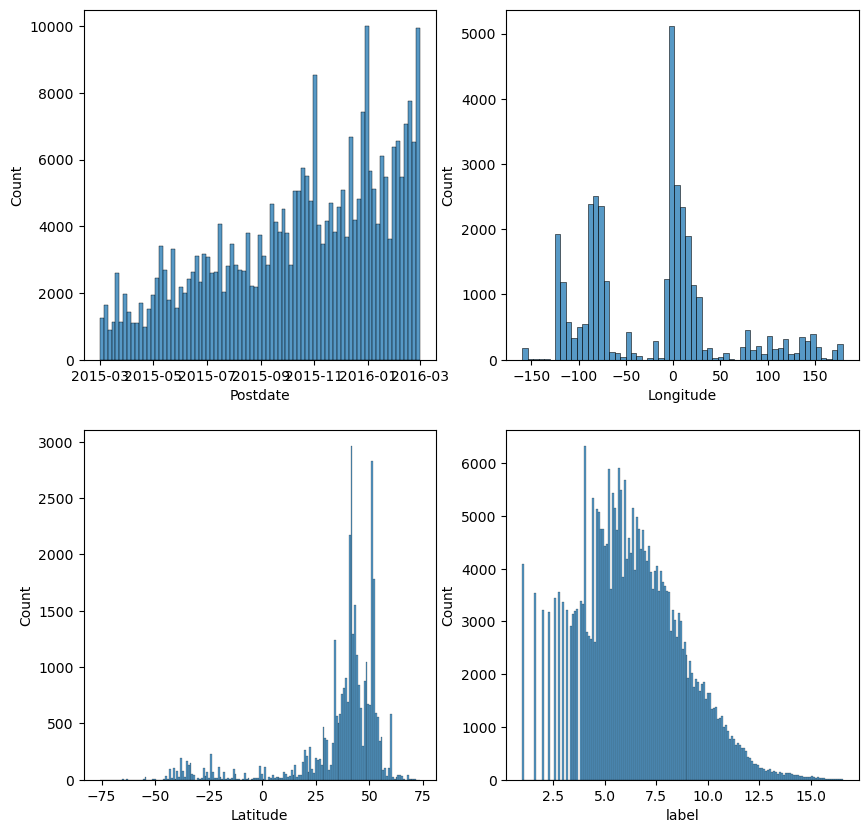

In [58]:
# Plotting histograms of numeric post variables
fig,ax = plt.subplots(2,2,figsize=[10,10])
for i,x in enumerate(['Postdate','Longitude','Latitude','label']):
    sns.histplot(df[x],ax=ax[i//2,i%2])
fig.show()

The histograms yield the following insights.
1. The majority of posts in the dataset were posted after September 2015.
2. Most posts occurred along longitudes 0 and -75 and and latitudes 35 and 55, indicating a preponderance towards North America and Western Europe.
3. The majority of posts had popularities ('label') betwwen 5 and 8 and a long tail for values higher than 8, indicating that only a minority of posts were very popular.

In [59]:
# Obtaining descriptive statistics of numeric user variables
user_df = df.drop_duplicates(subset='Uid')
user_df.shape

(38208, 19)

In [60]:
user_df = user_df[['Uid','photo_count','ispro','canbuypro','timezone_timezone_id','photo_firstdate','timezone_offset']]
user_df.describe()

,photo_count,timezone_timezone_id,photo_firstdate,timezone_offset
count,3.820800e+04,38208.000000,38135,38208.000000
mean,1.301560e+04,7.602387,2011-10-26 14:51:06.191529984,-1.648398
min,0.000000e+00,0.000000,1999-10-09 08:49:10,-12.000000
25%,6.290000e+02,2.000000,2009-03-03 04:29:04,-5.000000
50%,2.583000e+03,5.000000,2012-06-05 20:15:25,0.000000
75%,9.033000e+03,9.000000,2014-10-14 20:50:45,0.000000
max,2.978819e+06,91.000000,2016-07-25 19:48:32,13.000000
std,8.916447e+04,10.398395,NaN,4.278659


/tmp/ipykernel_98474/1993672574.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


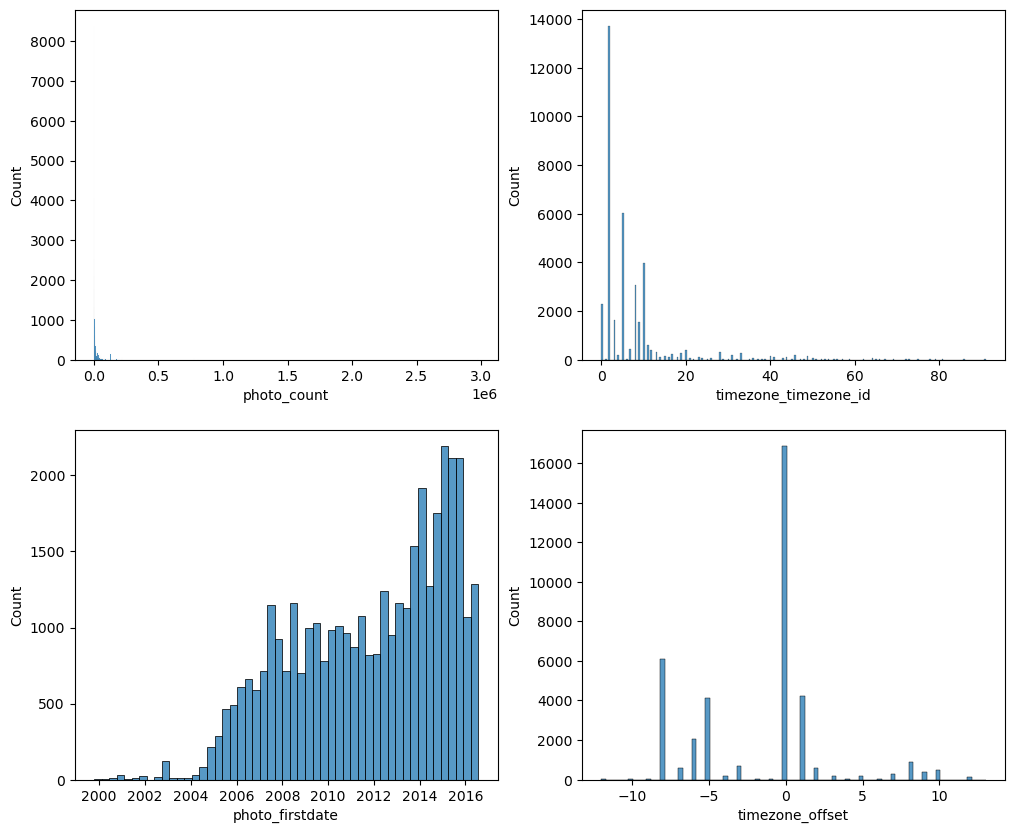

In [61]:
# Plotting histograms of numeric user variables
fig,ax = plt.subplots(2,2,figsize=[12,10])
for i,x in enumerate(['photo_count','timezone_timezone_id','photo_firstdate','timezone_offset']):
    sns.histplot(user_df[x],ax=ax[i//2,i%2])
fig.show()

/home/allen/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='photo_count', ylabel='Count'>

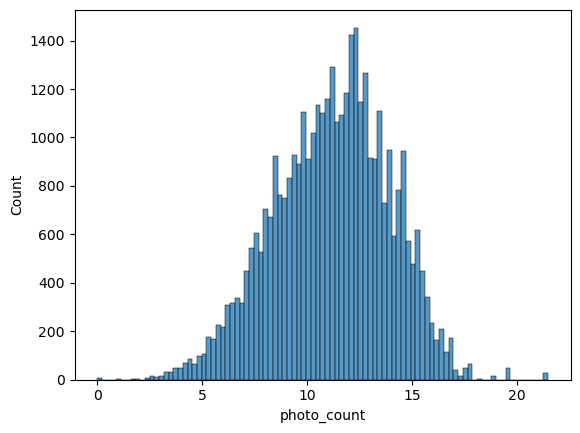

In [62]:
# Plotting a histogram of the log with base 2 of the photo count
sns.histplot(np.log2(user_df['photo_count']))

<Axes: xlabel='Geoaccuracy'>

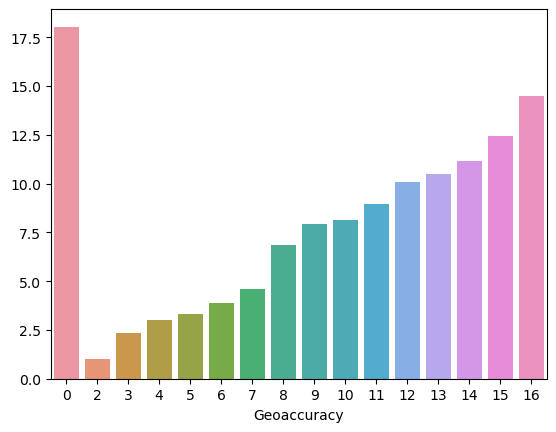

In [63]:
# Plotting a bar chart of the 'Geoaccuracy' with the y-axis on a logarithmic scale
g = np.log2(df['Geoaccuracy'].value_counts())
sns.barplot(x=g.index, y=g.values)

In [64]:
# Plotting a histogram of the number of posts of each user
df['Uid'].value_counts()

Uid
31253@N15     1376
32024@N27     1241
50945@N5      1120
37936@N48     1101
60519@N0      1100
              ... 
40937@N21        1
40936@N92        1
40935@N0         1
40934@N42        1
108435@N35       1
Name: count, Length: 38208, dtype: int64

<Axes: xlabel='count', ylabel='Count'>

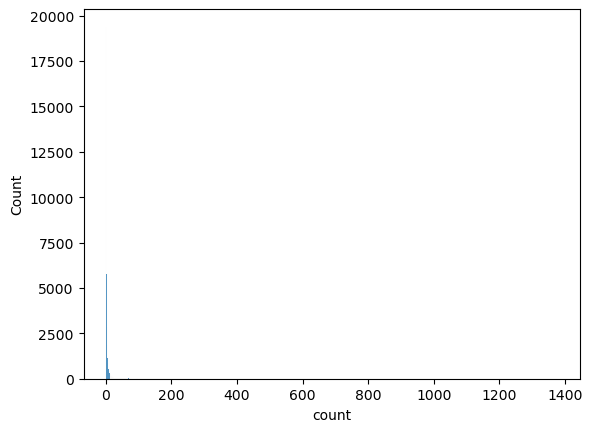

In [65]:
sns.histplot(df['Uid'].value_counts())

<Axes: xlabel='count', ylabel='Count'>

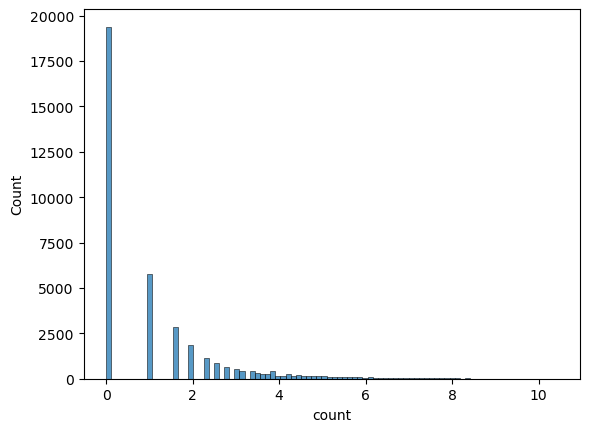

In [66]:
# Plotting the same histogram on a logarithmic scale to suppress large variations
sns.histplot(np.log2(df['Uid'].value_counts()))

The histograms yield the following insights.
1. The distribution of the photo count is approximately log-normal and the majority of users posted between 629 and 9033 photos. However, some users posted a large number of photos going as high as 2,978,819.
2. Most of the timezone IDs were smaller than or equal to 9.
3. Although the dataset contains users who posted their first photo from the 1999 onwards, the vast majority of users posted their first photo after the year 2006.

In [67]:
# Updating the lists of numeric, categorical and time variables
num_vars = list(df.select_dtypes(include=['number']).columns)
cat_vars = list(df.select_dtypes(include=['category','object']).columns)
tim_vars = list(df.select_dtypes(include=['datetime']).columns)

/tmp/ipykernel_98474/4142997646.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


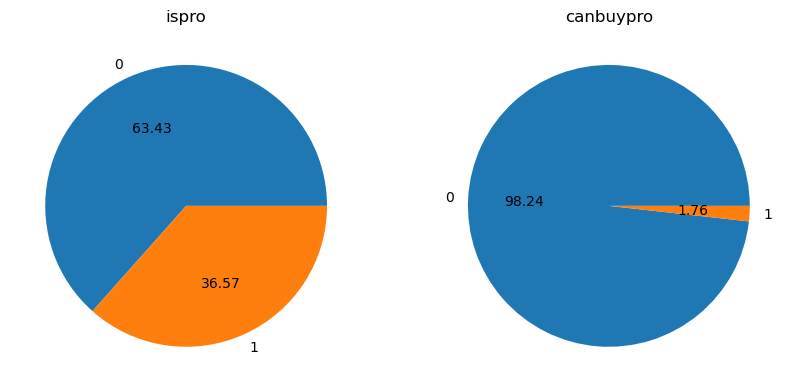

In [68]:
# Visualising categorical user variables using pie charts
fig,ax = plt.subplots(1,2,figsize=[10,5])
for i,x in enumerate(['ispro','canbuypro']):
    data = user_df[x].value_counts()
    labels = data.index
    ax[i].set_title(x)
    ax[i].pie(data,labels=labels,autopct='%.2f')
fig.show()

/tmp/ipykernel_98474/4042274971.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


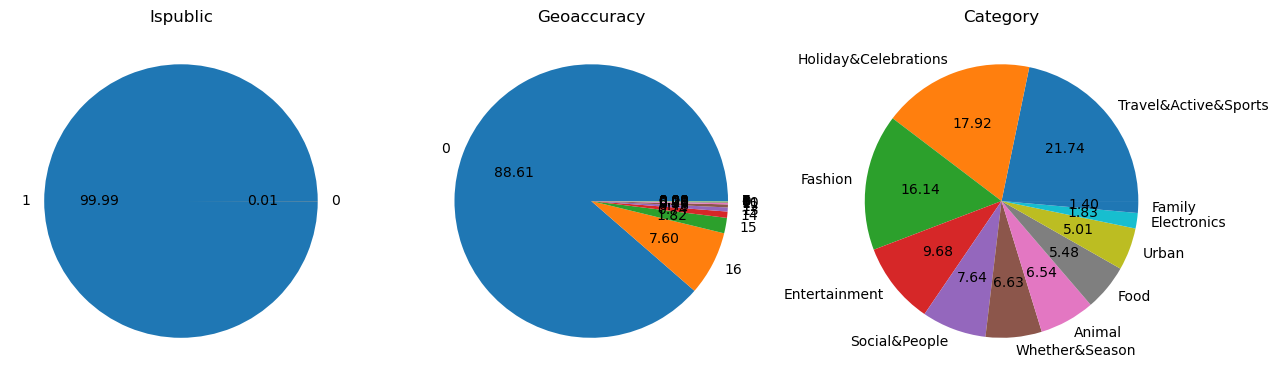

In [69]:
# Visualising categorical post variables using pie charts
fig,ax = plt.subplots(1,3,figsize=[15,5])
for i,x in enumerate(['Ispublic','Geoaccuracy','Category']):
    data = df[x].value_counts()
    labels = data.index
    ax[i].set_title(x)
    ax[i].pie(data,labels=labels,autopct='%.2f')
fig.show()

In [70]:
# Exploratory data analysis of titles and tags
df['TitleLen'] = df['Title'].map(lambda x: len(x))
df['TitleLen']

0         33
1         56
2         12
3         18
4          8
          ..
304993     9
304994     4
304995    12
304996     7
304997    21
Name: TitleLen, Length: 304998, dtype: int64

In [71]:
df['TagNum'] = df['Alltags'].map(lambda x: len(x.split()))
df['TagNum']

0         12
1         65
2         23
3          9
4         19
          ..
304993    35
304994     9
304995     8
304996    19
304997    20
Name: TagNum, Length: 304998, dtype: int64

/tmp/ipykernel_98474/537495574.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


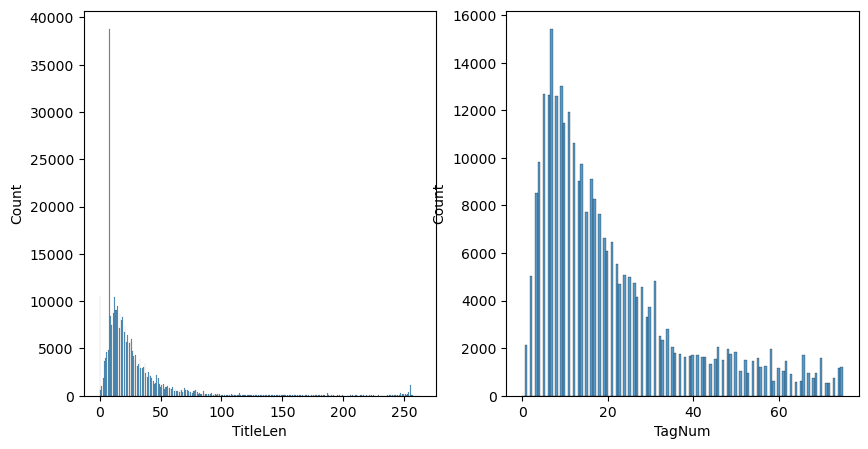

In [72]:
# Plotting histograms
fig,ax = plt.subplots(1,2,figsize=[10,5])
for i,x in enumerate(['TitleLen','TagNum']):
    sns.histplot(df[x],ax=ax[i])
fig.show()

The histograms show that the majority of posts had title lengths less than 50 and number of tags less than 20.

### 5.2 Bivariate Analysis

In [73]:
# Plotting the average popularity against user variables
df_groupby = df[['Uid','label']].groupby(by='Uid',as_index=False,sort=False).mean()

In [74]:
df_groupby.head()

,Uid,label
0,59@N75,11.586667
1,1@N18,14.154000
2,351@N64,10.990000
3,6@N59,8.630000
4,1617@N40,10.122308


In [75]:
user_df['label']=df_groupby['label']

In [76]:
user_df = user_df.reset_index(drop=True)
user_df.head()

,Uid,photo_count,ispro,canbuypro,timezone_timezone_id,photo_firstdate,timezone_offset,label
0,59@N75,6828,1,0,9,2008-06-17 23:03:50,1,11.586667
1,1@N18,32102,1,0,2,2010-01-12 03:25:43,0,14.154000
2,351@N64,276,0,0,11,2011-01-30 20:00:00,-3,10.990000
3,6@N59,32102,1,0,2,2010-01-12 03:25:43,0,8.630000
4,1617@N40,32102,1,0,2,2010-01-12 03:25:43,0,10.122308


/tmp/ipykernel_98474/1493842495.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


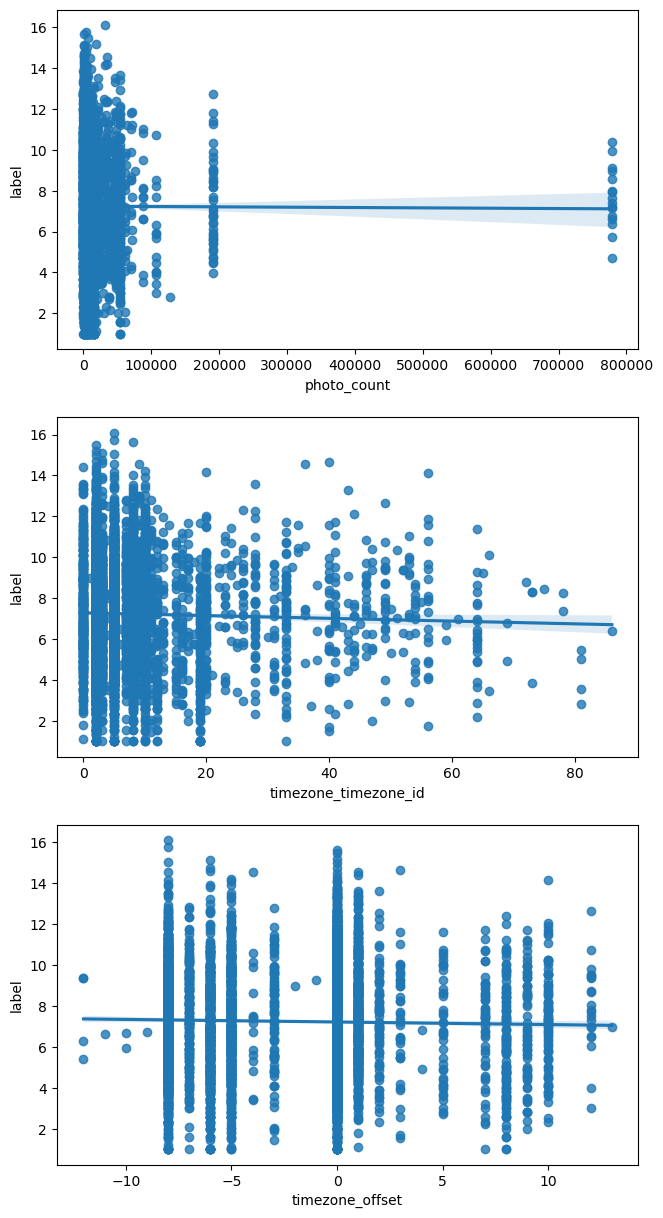

In [77]:
# Plotting scatter plots of average popularity against numeric user variables
fig,ax = plt.subplots(3,1,figsize=[7.5,15])
for i,x in enumerate(['photo_count','timezone_timezone_id','timezone_offset']):
    sns.regplot(x=x,y='label',data=user_df,ax=ax[i])
fig.show()

/tmp/ipykernel_98474/624151820.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


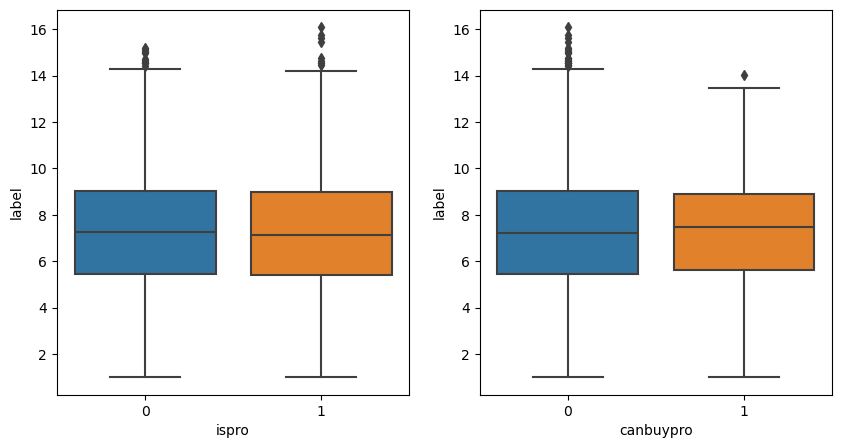

In [78]:
# Plotting box plots of average popularity against categorical user variables
fig,ax = plt.subplots(1,2,figsize=[10,5])
for i,x in enumerate(['ispro','canbuypro']):
    sns.boxplot(x=x,y='label',data=user_df,ax=ax[i])
fig.show()

/tmp/ipykernel_98474/3051481021.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


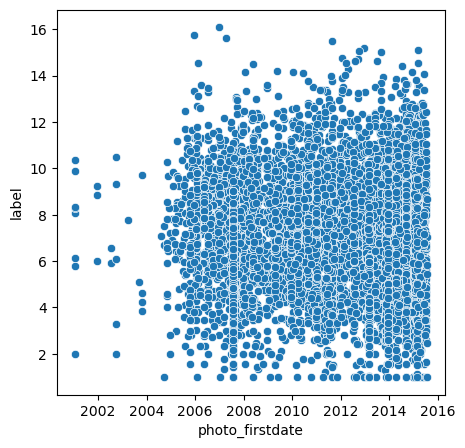

In [79]:
# Plotting average popularity against photo_firstdate
fig,ax = plt.subplots(1,1,figsize=[5,5])
sns.scatterplot(x='photo_firstdate',y='label',data=user_df,ax=ax)
fig.show()

/tmp/ipykernel_98474/4222378862.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


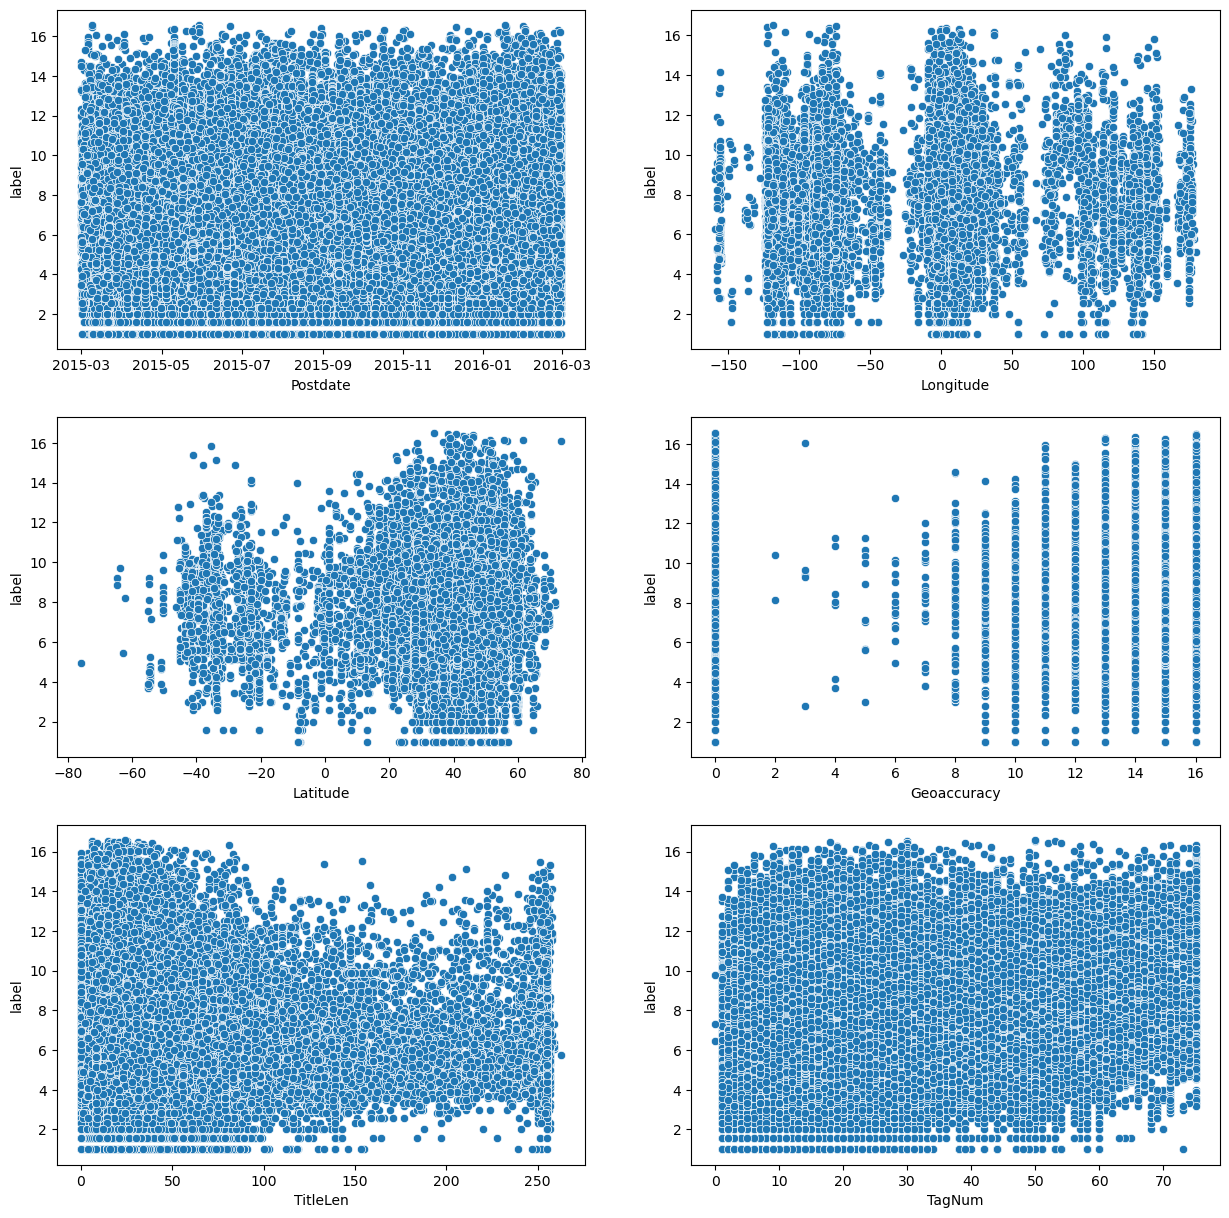

In [80]:
# Plotting scatter plots of popularity against numeric post variables
fig,ax = plt.subplots(3,2,figsize=[15,15])
for i,x in enumerate(['Postdate','Longitude','Latitude','Geoaccuracy','TitleLen','TagNum']):
    sns.scatterplot(x=x,y='label',data=df,ax=ax[i//2,i%2])
fig.show()

/tmp/ipykernel_98474/1319870489.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


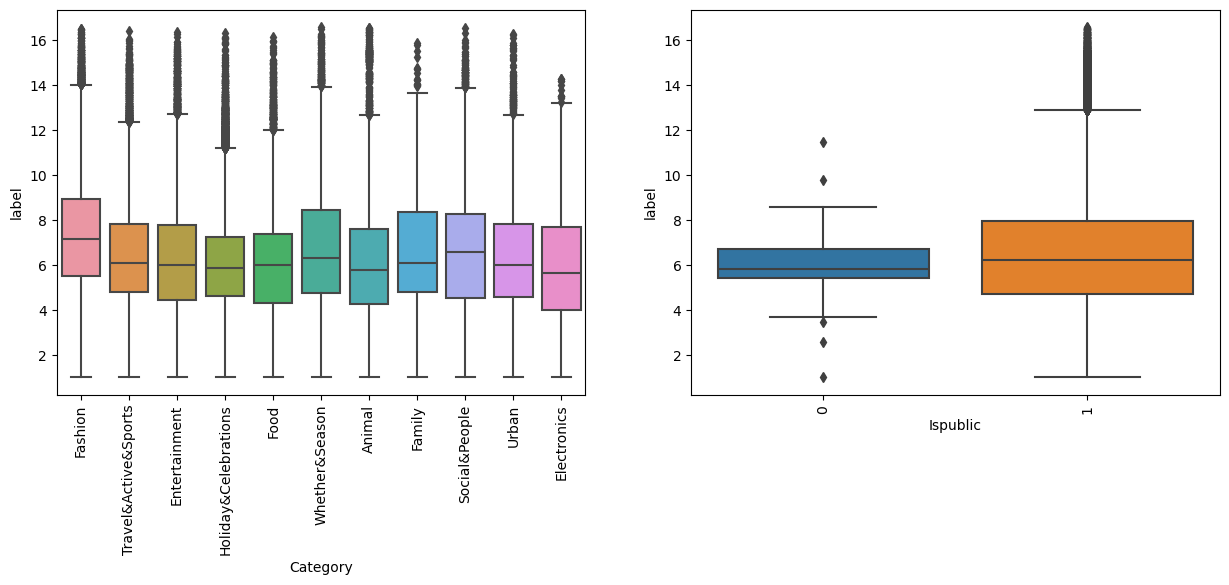

In [81]:
# Plotting box plots of popularity against categorical post variables
fig,ax = plt.subplots(1,2,figsize=[15,5])
for i,x in enumerate(['Category','Ispublic']):
    g = sns.boxplot(x=x,y='label',data=df,ax=ax[i])
    g.set_xticklabels(g.get_xticklabels(),rotation=90)
fig.show()

## 6 Feature Engineering

In [82]:
# Viewing the data
df.head()

,Ispublic,Uid,photo_count,ispro,canbuypro,timezone_timezone_id,photo_firstdate,timezone_offset,Postdate,Longitude,Geoaccuracy,Latitude,Category,Concept,Subcategory,img_path,Alltags,Title,label,TitleLen,TagNum
0,1,59@N75,6828,1,0,9,2008-06-17 23:03:50,1,2015-10-28 07:19:38,NaN,0,NaN,Fashion,glam,Fashion,train/59@N75/775.jpg,rock punk transgender tranny electronicmusic e...,Luis Drayton - Edinburgh shoot #6,11.18,33,12
1,1,1@N18,32102,1,0,2,2010-01-12 03:25:43,0,2016-02-09 02:02:59,NaN,0,NaN,Travel&Active&Sports,fifa,Soccer,train/1@N18/1075.jpg,brazil rio brasil riodejaneiro by maria fifa m...,Arena da Barra - Arena HSBC - Arena do PAN #...,15.15,56,65
2,1,351@N64,276,0,0,11,2011-01-30 20:00:00,-3,2015-06-01 00:30:04,NaN,0,NaN,Entertainment,cinema,Movies,train/351@N64/4890.jpg,old cinema beauty marilyn photoshop movie joke...,MARILYN 2015,10.99,12,23
3,1,6@N59,32102,1,0,2,2010-01-12 03:25:43,0,2015-12-31 16:00:00,NaN,0,NaN,Holiday&Celebrations,old,Birthday,train/6@N59/6568.jpg,pictures old family scans brothers sister 1958...,Knikkertijd - 1959,8.63,18,9
4,1,1617@N40,32102,1,0,2,2010-01-12 03:25:43,0,2015-03-07 16:07:18,NaN,0,NaN,Food,thirsty,Drinks,train/1617@N40/7079.jpg,hot sahara animal animals desert bottles drink...,CAMELS01,11.16,8,19


In [83]:
# Dropping 'Ispublic' because it has almost 0 variance
df['Ispublic'].astype('int').var()

0.0001442429021178194

In [84]:
df = df.drop(columns='Ispublic')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304998 entries, 0 to 304997
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Uid                   304998 non-null  object        
 1   photo_count           304998 non-null  int64         
 2   ispro                 304998 non-null  category      
 3   canbuypro             304998 non-null  category      
 4   timezone_timezone_id  304998 non-null  int64         
 5   photo_firstdate       304286 non-null  datetime64[ns]
 6   timezone_offset       304998 non-null  int64         
 7   Postdate              304998 non-null  datetime64[ns]
 8   Longitude             34748 non-null   float64       
 9   Geoaccuracy           304998 non-null  int64         
 10  Latitude              34748 non-null   float64       
 11  Category              304998 non-null  object        
 12  Concept               304998 non-null  object        
 13 

In [86]:
# Deriving DaysSinceFirstPhoto from the photo_firstdate and Postdate
df['DaysSinceFirstPhoto'] = (df['Postdate'] - df['photo_firstdate']).apply(lambda x: x.days)
df['DaysSinceFirstPhoto']

0         2688.0
1         2218.0
2         1582.0
3         2179.0
4         1880.0
           ...  
304993    1802.0
304994     474.0
304995     579.0
304996    2406.0
304997    2216.0
Name: DaysSinceFirstPhoto, Length: 304998, dtype: float64

<Axes: xlabel='DaysSinceFirstPhoto', ylabel='Count'>

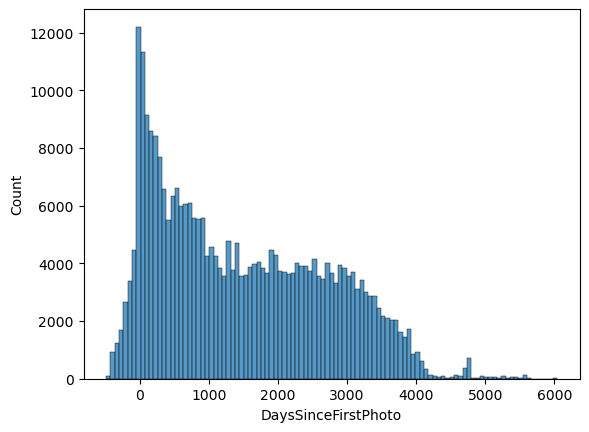

In [87]:
# Validating 'DaysSinceFirstPhoto'
sns.histplot(df['DaysSinceFirstPhoto'])

<Axes: xlabel='DaysSinceFirstPhoto', ylabel='Count'>

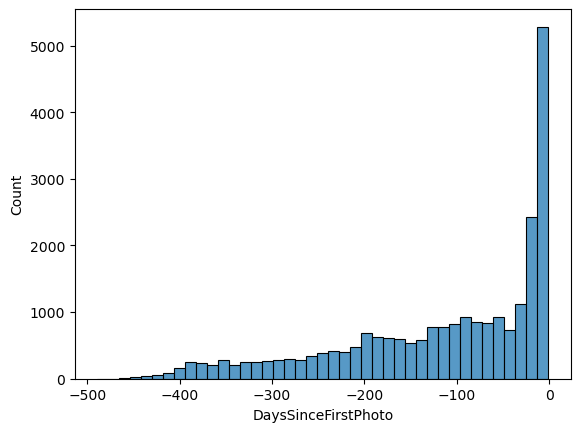

In [88]:
d = df['DaysSinceFirstPhoto'][df['DaysSinceFirstPhoto']<0]
sns.histplot(d)

In [89]:
# Imputing negative values of 'DaysSinceFirstPhoto' with the median
m = df['DaysSinceFirstPhoto'][df['DaysSinceFirstPhoto']>=0].median()
m

1425.0

/tmp/ipykernel_98474/2155466263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DaysSinceFirstPhoto'][df['DaysSinceFirstPhoto']<0]=m


<Axes: xlabel='DaysSinceFirstPhoto', ylabel='Count'>

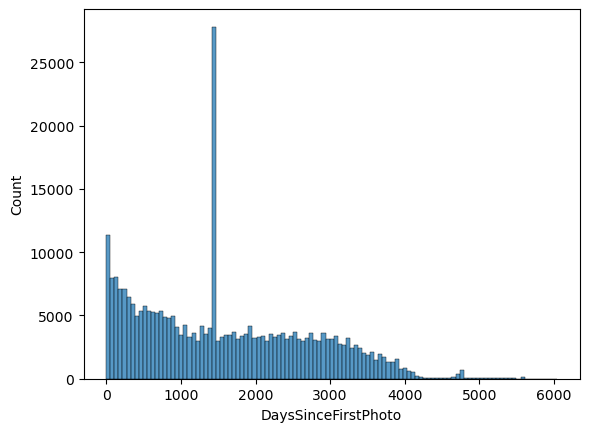

In [90]:
df['DaysSinceFirstPhoto'][df['DaysSinceFirstPhoto']<0]=m
sns.histplot(df['DaysSinceFirstPhoto'])

In [91]:
# Dropping 'photo_firstdate', 'TitleLen' and 'TagNum' from the DataFrame
df = df.drop(columns=['photo_firstdate','Title','Alltags'])

In [92]:
# Extracting the day of the week from 'Postdate'
df['DayOfWeek'] = df['Postdate'].apply(lambda x: x.day_name())
df['DayOfWeek']

0         Wednesday
1           Tuesday
2            Monday
3          Thursday
4          Saturday
            ...    
304993     Saturday
304994     Saturday
304995     Saturday
304996     Thursday
304997    Wednesday
Name: DayOfWeek, Length: 304998, dtype: object

In [93]:
# Extracting the month from 'Postdate'
df['Month'] = df['Postdate'].apply(lambda x: x.month_name())
df['Month']

0           October
1          February
2              June
3          December
4             March
            ...    
304993         June
304994       August
304995      October
304996    September
304997        March
Name: Month, Length: 304998, dtype: object

In [94]:
# Extracting the segment of the day from 'Postdate'
def post_time(t):
    if t.hour >= 6 and t.hour < 12:
        return 'Morning'
    elif t.hour >= 12 and t.hour < 18:
        return 'Afternoon'
    elif t.hour >= 18 and t.hour <24:
        return 'Evening'
    else:
        return 'Night'

In [95]:
df['Time'] = df['Postdate'].apply(post_time)
df['Time']

0           Morning
1             Night
2             Night
3         Afternoon
4         Afternoon
            ...    
304993      Morning
304994      Morning
304995      Morning
304996        Night
304997      Morning
Name: Time, Length: 304998, dtype: object

In [96]:
# Dropping the Postdate column
df = df.drop(columns='Postdate')

In [97]:
# Obtaining city and country from latitude and longitude
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='smpp')

def get_cc(row):
    latitude = row['Latitude']
    longitude = row['Longitude']
    if np.isnan(latitude) or np.isnan(longitude):
        return ('Unknown','Unknown')
    else:
        try:
            location = geolocator.reverse(f"{latitude},{longitude}") 
            address = location.raw['address']
            city = address.get('city', '')
            country = address.get('country', '')
            return city, country
        except:
            return ('Unknown','Unknown')

In [98]:
# df[['City','Country']] = df[['Latitude','Longitude']].apply(get_cc, axis=1,result_type='expand')
# df[['City','Country']]

In [99]:
# Dropping 'Latitude' and 'Longitude'
df = df.drop(columns=['Latitude','Longitude']).reset_index(drop=True)
df.head()

,Uid,photo_count,ispro,canbuypro,timezone_timezone_id,timezone_offset,Geoaccuracy,Category,Concept,Subcategory,img_path,label,TitleLen,TagNum,DaysSinceFirstPhoto,DayOfWeek,Month,Time
0,59@N75,6828,1,0,9,1,0,Fashion,glam,Fashion,train/59@N75/775.jpg,11.18,33,12,2688.0,Wednesday,October,Morning
1,1@N18,32102,1,0,2,0,0,Travel&Active&Sports,fifa,Soccer,train/1@N18/1075.jpg,15.15,56,65,2218.0,Tuesday,February,Night
2,351@N64,276,0,0,11,-3,0,Entertainment,cinema,Movies,train/351@N64/4890.jpg,10.99,12,23,1582.0,Monday,June,Night
3,6@N59,32102,1,0,2,0,0,Holiday&Celebrations,old,Birthday,train/6@N59/6568.jpg,8.63,18,9,2179.0,Thursday,December,Afternoon
4,1617@N40,32102,1,0,2,0,0,Food,thirsty,Drinks,train/1617@N40/7079.jpg,11.16,8,19,1880.0,Saturday,March,Afternoon


In [101]:
# Imputing missing values of 'DaysSinceFirstPhoto' with the median
m = df['DaysSinceFirstPhoto'].median()
df['DaysSinceFirstPhoto'] = df['DaysSinceFirstPhoto'].fillna(m)

In [102]:
# # Saving the data containing engineered features
# df.to_json('train_data_engineered.json')

In [3]:
df = pd.read_json('train_data_engineered.json')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304998 entries, 0 to 304997
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Uid                   304998 non-null  object 
 1   photo_count           304998 non-null  int64  
 2   ispro                 304998 non-null  int64  
 3   canbuypro             304998 non-null  int64  
 4   timezone_timezone_id  304998 non-null  int64  
 5   timezone_offset       304998 non-null  int64  
 6   Geoaccuracy           304998 non-null  int64  
 7   Category              304998 non-null  object 
 8   Concept               304998 non-null  object 
 9   Subcategory           304998 non-null  object 
 10  img_path              304998 non-null  object 
 11  label                 304998 non-null  float64
 12  TitleLen              304998 non-null  int64  
 13  TagNum                304998 non-null  int64  
 14  DaysSinceFirstPhoto   304998 non-null  int64  
 15  DayOf

Since the data is almost 30GB in size, a sample of about 40% of the data will used to manage computational requirements for training the deep learning model. The sample will be drawn by sampling users randomly and collecting all posts associated with them (as opposed to sampling the posts randomly), to better capture the relationships between the user variables and response variable. This is because the previous studies have shown that user variables are generally more important than post variables for SMPP.

In [5]:
# Taking a sample of 40% of users
Uid = df['Uid'].drop_duplicates()
Uid.shape

(38208,)

In [6]:
Uid_sam = Uid.sample(frac=0.40,random_state=1)
Uid_sam

303426    107593@N6
40157     29557@N78
290289    94688@N54
171370    45845@N54
32850     28706@N65
            ...    
64358     32821@N43
272441    85930@N98
146547    42757@N51
177296    46572@N10
265400    81346@N40
Name: Uid, Length: 15283, dtype: object

In [7]:
# Collecting post data associated with the sampled users
df_sample = df[df['Uid'].isin(Uid_sam)]
df_sample

,Uid,photo_count,ispro,canbuypro,timezone_timezone_id,timezone_offset,Geoaccuracy,Category,Concept,Subcategory,img_path,label,TitleLen,TagNum,DaysSinceFirstPhoto,DayOfWeek,Month,Time,City,Country
2,351@N64,276,0,0,11,-3,0,Entertainment,cinema,Movies,train/351@N64/4890.jpg,10.99,12,23,1582,Monday,June,Night,Unknown,Unknown
3,6@N59,32102,1,0,2,0,0,Holiday&Celebrations,old,Birthday,train/6@N59/6568.jpg,8.63,18,9,2179,Thursday,December,Afternoon,Unknown,Unknown
12,3175@N73,999,1,0,8,0,0,Entertainment,rnb,Music,train/3175@N73/16586.jpg,9.67,22,46,1173,Friday,July,Afternoon,Unknown,Unknown
13,3175@N73,20032,1,0,5,-8,0,Entertainment,rnb,Music,train/3175@N73/16587.jpg,8.85,22,46,1700,Friday,July,Afternoon,Unknown,Unknown
14,3175@N73,3305,0,1,5,-8,0,Entertainment,rnb,Music,train/3175@N73/16588.jpg,8.67,22,46,1163,Friday,July,Afternoon,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304981,91286@N45,157,0,0,2,0,0,Whether&Season,color,Spring,train/91286@N45/1118177.jpg,1.00,22,10,10,Saturday,June,Night,Unknown,Unknown
304984,46959@N39,7167,1,0,20,10,0,Whether&Season,autumn,Fall,train/46959@N39/1118188.jpg,2.32,8,16,2442,Friday,October,Night,Unknown,Unknown
304988,74661@N44,205,1,0,8,0,16,Travel&Active&Sports,travel,Travel,train/74661@N44/1118291.jpg,3.32,8,18,981,Tuesday,October,Night,,United States
304991,70620@N11,2117,1,0,2,0,16,Travel&Active&Sports,travel,Travel,train/70620@N11/1118325.jpg,5.17,12,15,2136,Friday,April,Night,,United States


In [8]:
df_sample = df_sample.reset_index(drop=True)

In [9]:
# Dropping users with only 1 post from df_sample
df_sample['Uid'].duplicated(keep=False).sum()

110749

In [10]:
df_sample = df_sample[df_sample['Uid'].duplicated(keep=False)]
df_sample = df_sample.reset_index(drop=True)

In [11]:
df_sample

,Uid,photo_count,ispro,canbuypro,timezone_timezone_id,timezone_offset,Geoaccuracy,Category,Concept,Subcategory,img_path,label,TitleLen,TagNum,DaysSinceFirstPhoto,DayOfWeek,Month,Time,City,Country
0,3175@N73,999,1,0,8,0,0,Entertainment,rnb,Music,train/3175@N73/16586.jpg,9.67,22,46,1173,Friday,July,Afternoon,Unknown,Unknown
1,3175@N73,20032,1,0,5,-8,0,Entertainment,rnb,Music,train/3175@N73/16587.jpg,8.85,22,46,1700,Friday,July,Afternoon,Unknown,Unknown
2,3175@N73,3305,0,1,5,-8,0,Entertainment,rnb,Music,train/3175@N73/16588.jpg,8.67,22,46,1163,Friday,July,Afternoon,Unknown,Unknown
3,3175@N73,3305,0,1,5,-8,0,Entertainment,rnb,Music,train/3175@N73/16589.jpg,8.61,22,46,1163,Friday,July,Afternoon,Unknown,Unknown
4,3175@N73,3305,0,1,5,-8,0,Entertainment,rnb,Music,train/3175@N73/16590.jpg,9.00,22,46,1163,Friday,July,Afternoon,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110744,91286@N45,157,0,0,2,0,0,Whether&Season,color,Spring,train/91286@N45/1118177.jpg,1.00,22,10,10,Saturday,June,Night,Unknown,Unknown
110745,46959@N39,7167,1,0,20,10,0,Whether&Season,autumn,Fall,train/46959@N39/1118188.jpg,2.32,8,16,2442,Friday,October,Night,Unknown,Unknown
110746,74661@N44,205,1,0,8,0,16,Travel&Active&Sports,travel,Travel,train/74661@N44/1118291.jpg,3.32,8,18,981,Tuesday,October,Night,,United States
110747,70620@N11,2117,1,0,2,0,16,Travel&Active&Sports,travel,Travel,train/70620@N11/1118325.jpg,5.17,12,15,2136,Friday,April,Night,,United States


In [12]:
df_sample.to_json('social_data_sample.json')